# Keras Tutorial

Keras is a popular deep learning framework and it's easy to get started.

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

BATCH_SIZE = 128
NUM_CLASSES = 10
NUM_EPOCHS = 10

First, we read the mnist data and preprocess them.

In [2]:
# download and load the data (split them between train and test sets)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# expand the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# make the value of pixels from [0, 255] to [0, 1] for further process
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert class vectors to binary class matrics
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

Then, we define the model, object function and optimizer that we use to classify.

In [8]:
# define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# define the object function, optimizer and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)       

Next, we can start to train and evaluate!

In [10]:
# train
history = model.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=NUM_EPOCHS,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.6723 - acc: 0.7925 - val_loss: 0.1526 - val_acc: 0.9520
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1819 - acc: 0.9443 - val_loss: 0.0808 - val_acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1199 - acc: 0.9631 - val_loss: 0.0577 - val_acc: 0.9805
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0954 - acc: 0.9703 - val_loss: 0.0458 - val_acc: 0.9846
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0807 - acc: 0.9759 - val_loss: 0.0399 - val_acc: 0.9857
Epoch 6/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.0707 - acc: 0.9786 - val_loss: 0.0344 - val_acc: 0.9878
Epoch 7/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0639 - acc: 0.9808 - val_loss: 0.

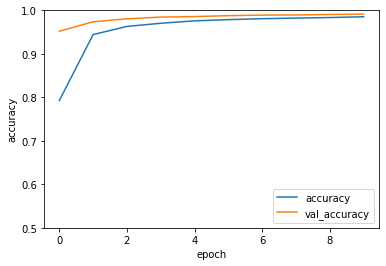

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#### Q6:
Please print the training and testing accuracy.

In [15]:
# evaluate
score_train = model.evaluate(x_train, y_train, verbose=1)
print('Training loss: %.4f, Training accuracy: %.2f%%' % (score_train[0] * 100, score_train[1] * 100))
score_test = model.evaluate(x_test, y_test, verbose=1)
print('Testing loss: %.4f, Testing accuracy: %.2f%%' % (score_test[0] * 100, score_test[1] * 100))

60000/60000 [==============================] - 14s 228us/sample - loss: 0.0278 - acc: 0.9916
Training loss: 2.7831, Training accuracy: 99.16%
10000/10000 [==============================] - 2s 235us/sample - loss: 0.0262 - acc: 0.9912
Testing loss: 2.6241, Testing accuracy: 99.12%
